# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|
Income : 매장지역의 주민들의 평균소득 단위 천달러

* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

In [2]:
import scipy.stats as spst
import statsmodels.api as sm

import warnings
plt.rcParams['figure.figsize']=[10,8]
sns.set(style='white')
sns.set_palette('Set2')

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [3]:
# matplotlib 한글 설정
import platform
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 0.2 Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제**를 위해 필요합니다.

In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [6]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [7]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [8]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

- nan이 포함된 컬럼
    - CompPrice : 13개
    - Income : 12개

- 변수 : CompPrice
    - 숫자형 변수

In [9]:
x["CompPrice"].describe()

count    287.000000
mean     125.344948
std       14.551674
min       86.000000
25%      116.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

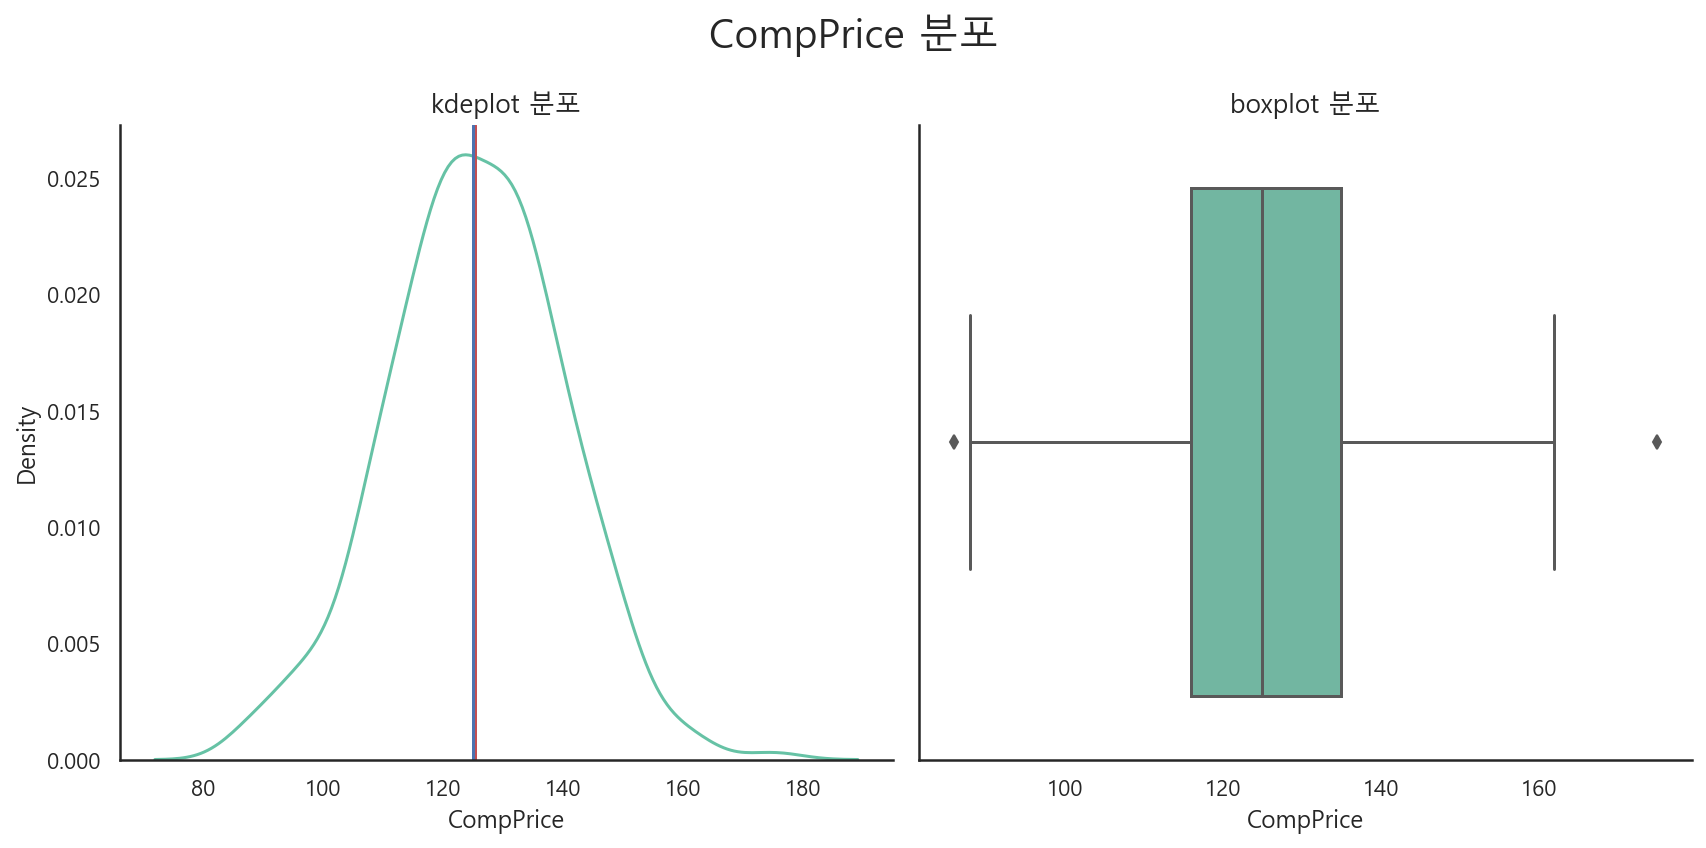

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.kdeplot(x["CompPrice"])
plt.axvline(x["CompPrice"].mean(), color='r')
plt.axvline(x["CompPrice"].median(), color='b')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(1,2,2)
sns.boxplot(x["CompPrice"])
sns.despine()
plt.title("boxplot 분포", size = 13)

title = "CompPrice 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

- 정규분포형태이고, 중앙값과 평균값이 비슷하므로, nan값을 평균값으로 대체

In [11]:
x["CompPrice"].fillna(x["CompPrice"].mean(), inplace=True)

- 변수 : Income
    - 숫자형 변수

In [12]:
x["Income"].describe()

count    288.000000
mean      68.673611
std       28.558597
min       21.000000
25%       42.000000
50%       69.000000
75%       93.000000
max      120.000000
Name: Income, dtype: float64

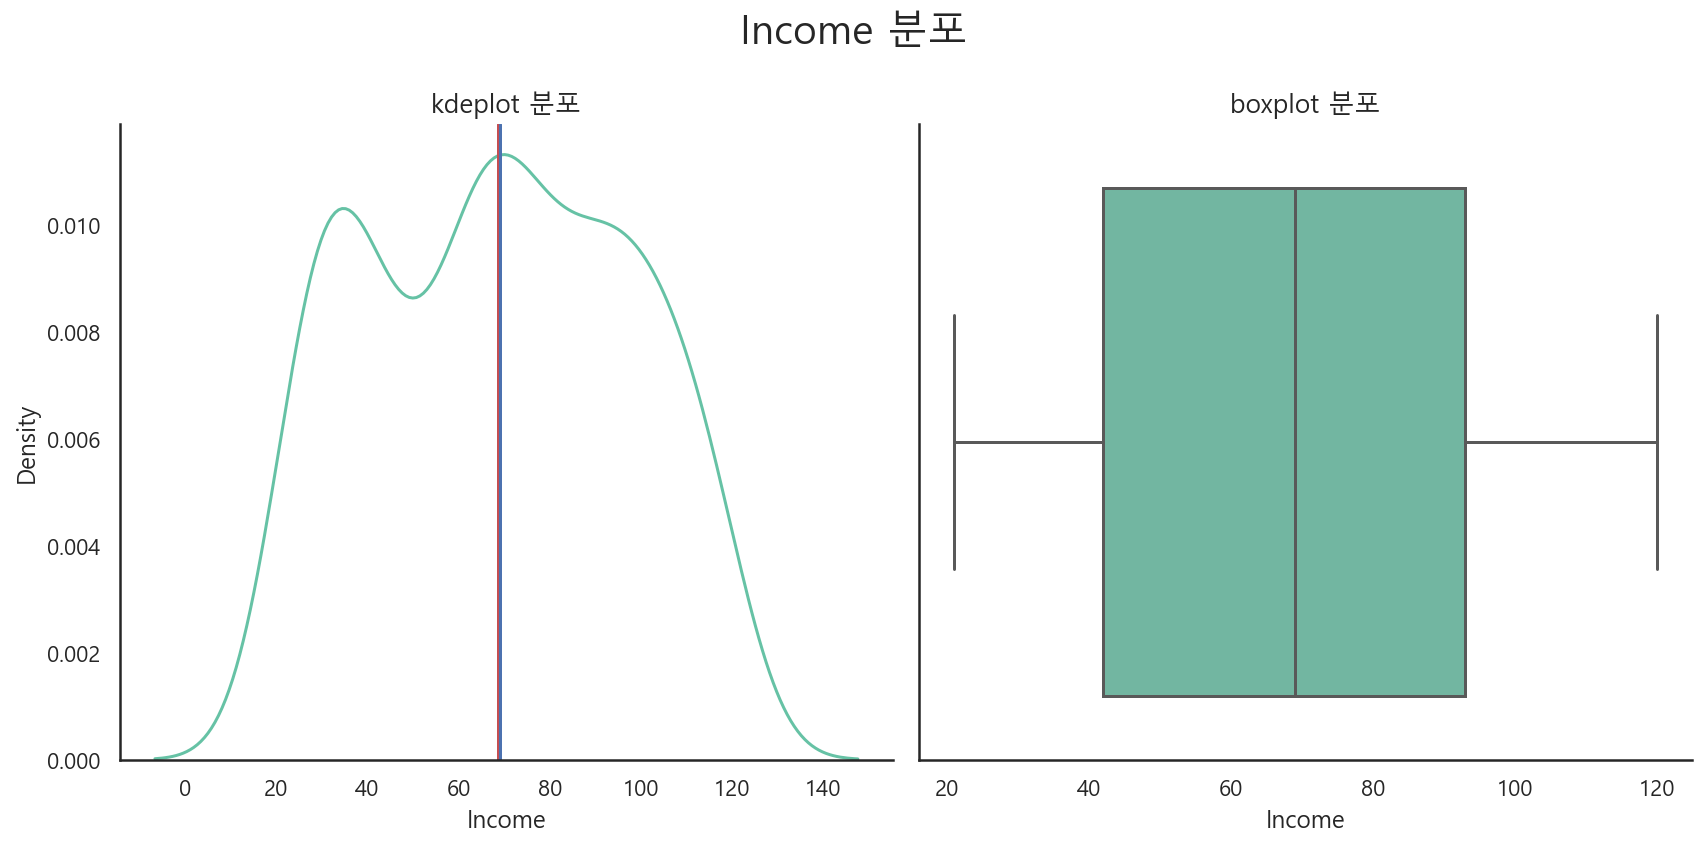

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.kdeplot(x["Income"])
plt.axvline(x["Income"].mean(), color='r')

plt.axvline(x["Income"].median(), color='b')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(1,2,2)
sns.boxplot(x["Income"])
sns.despine()
plt.title("boxplot 분포", size = 13)

title = "Income 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

- 분포가 약간 이봉형이지만, 평균값과 중앙값이 비슷하므로, nan값을 평균값으로 대체

In [14]:
x["Income"].fillna(x["Income"].mean(), inplace=True)

In [15]:
x.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [16]:
# 범주형인 데이터
x.select_dtypes('object').columns

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [17]:
x = pd.get_dummies(x, drop_first=True)
x.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,139.0,111.0,5,310,132,62,13,0,0,1,1
1,143.0,21.0,5,81,160,67,12,0,1,0,1


In [18]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,3.72,139.0,111.0,5,310,132,62,13,0,0,1,1
1,2.93,143.0,21.0,5,81,160,67,12,0,1,0,1
2,4.53,114.0,NaN,0,97,125,29,12,0,1,1,0
3,8.47,119.0,88.0,10,170,101,61,13,0,1,1,1
4,11.85,136.0,81.0,15,425,120,67,10,1,0,1,1


### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

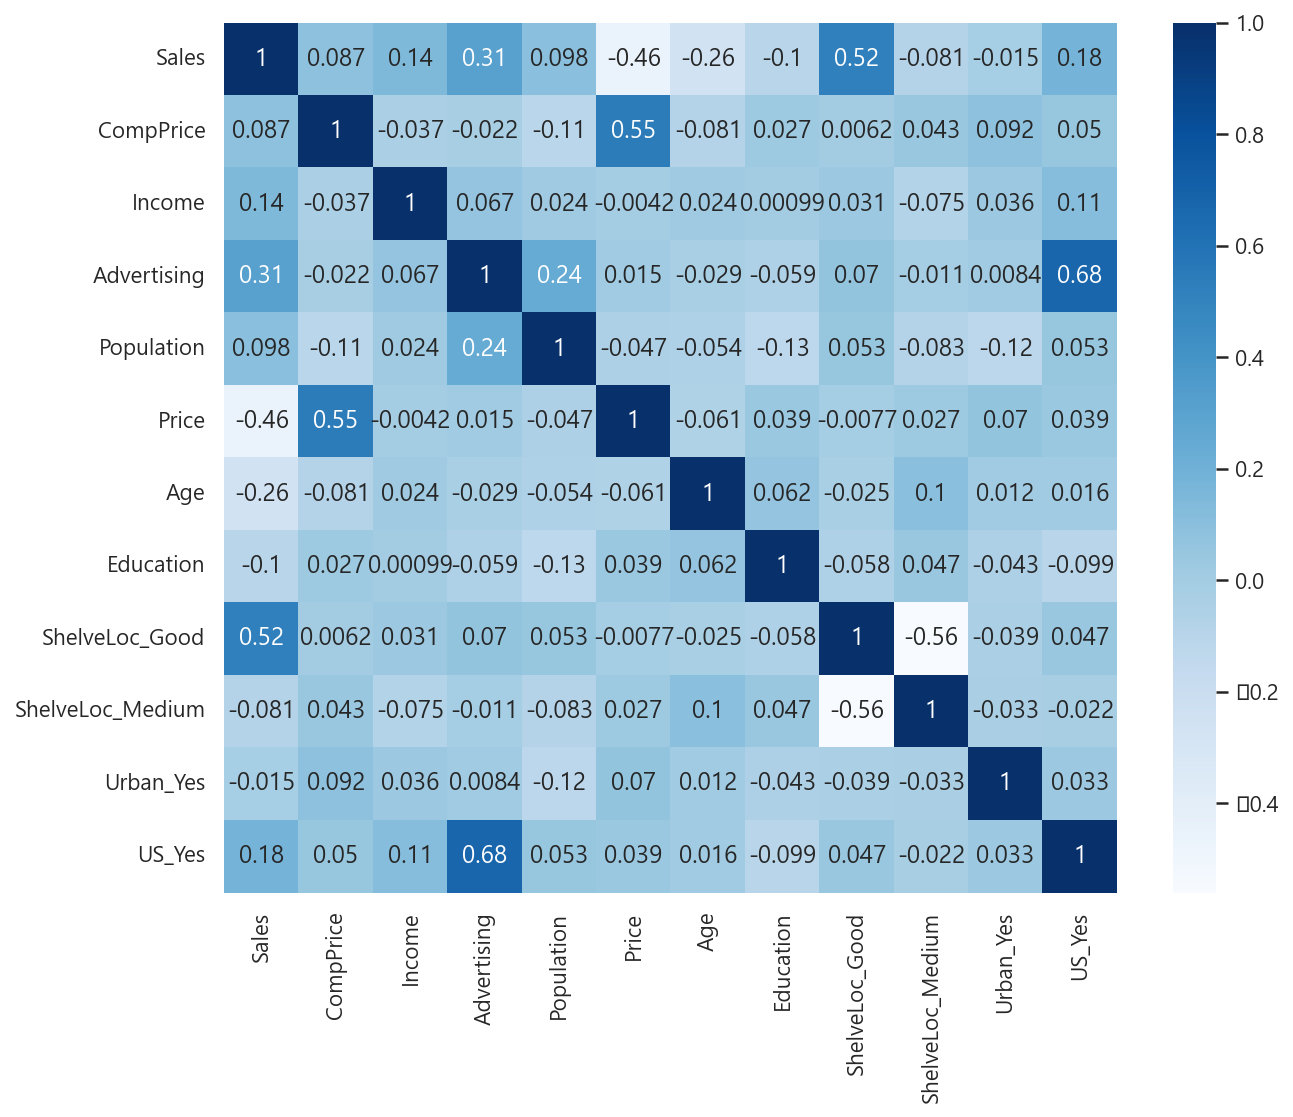

In [19]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

- 상관관계가 높은 변수들
    - US_Yes와 Advertising
    - Sales와 ShelveLoc_Medium
    - CompPrice와 Price
- 상관관계가 어느정도 있는 변수들
    - Sales와 Advertising
    - Population와 Advertsing

#### 2.4.1 지역 인구별 광고 예산 변수 도출

In [20]:
data["Ad_P"] = data["Advertising"] / data["Population"]

- 지역 인구별 광고 예산과 Sale의 관계

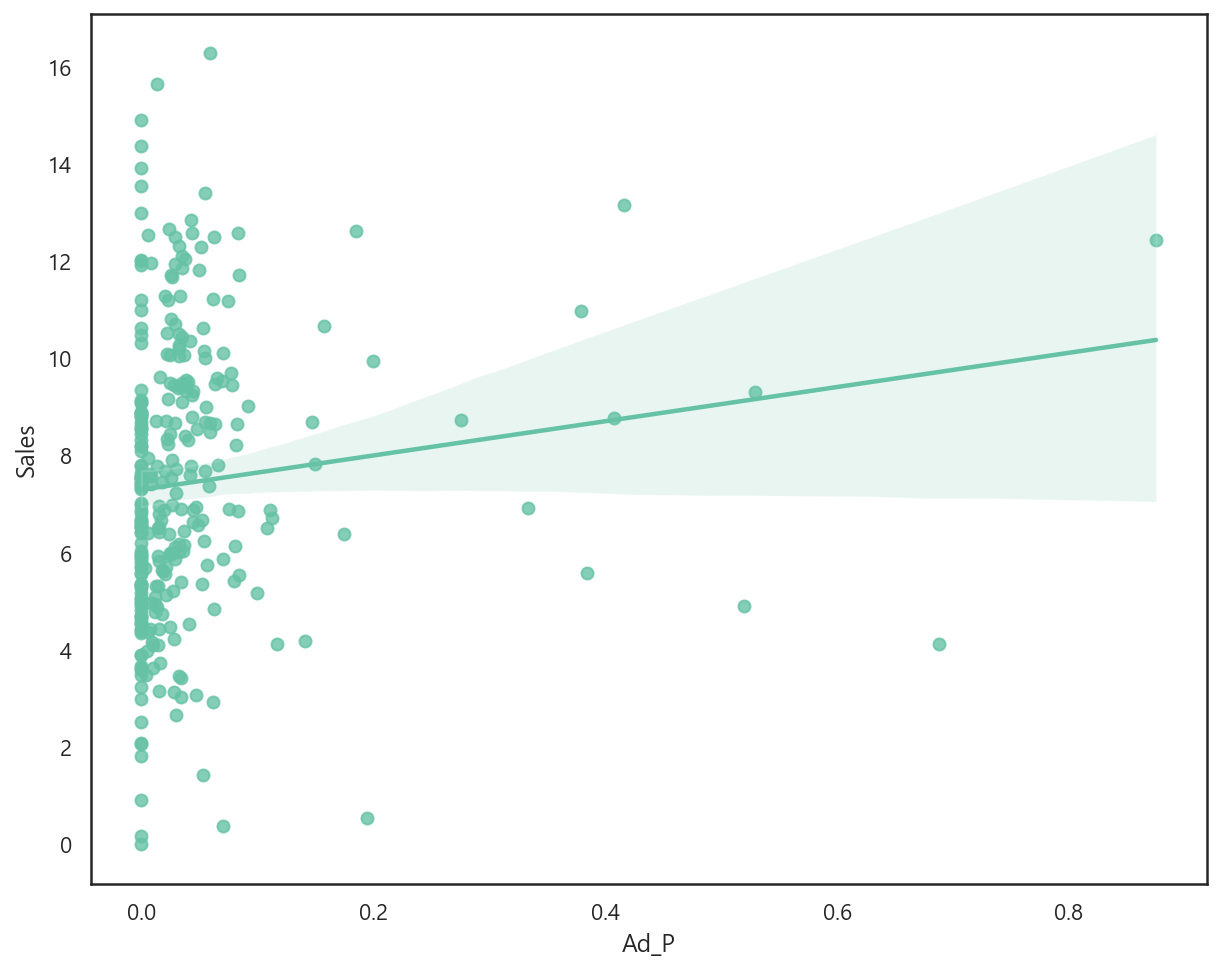

In [21]:
sns.regplot(x='Ad_P', y = target, data = data)
plt.show()

- 지역 인구별 광고예산과 Sales는 약한 관계가 있다

In [22]:
x["Ad_P"] = data["Ad_P"]

#### 2.4.2 Advertising 유무에 따른 변수 도출

In [23]:
data["Ad_yes"]= np.where(data["Advertising"]==0, 0, 1)

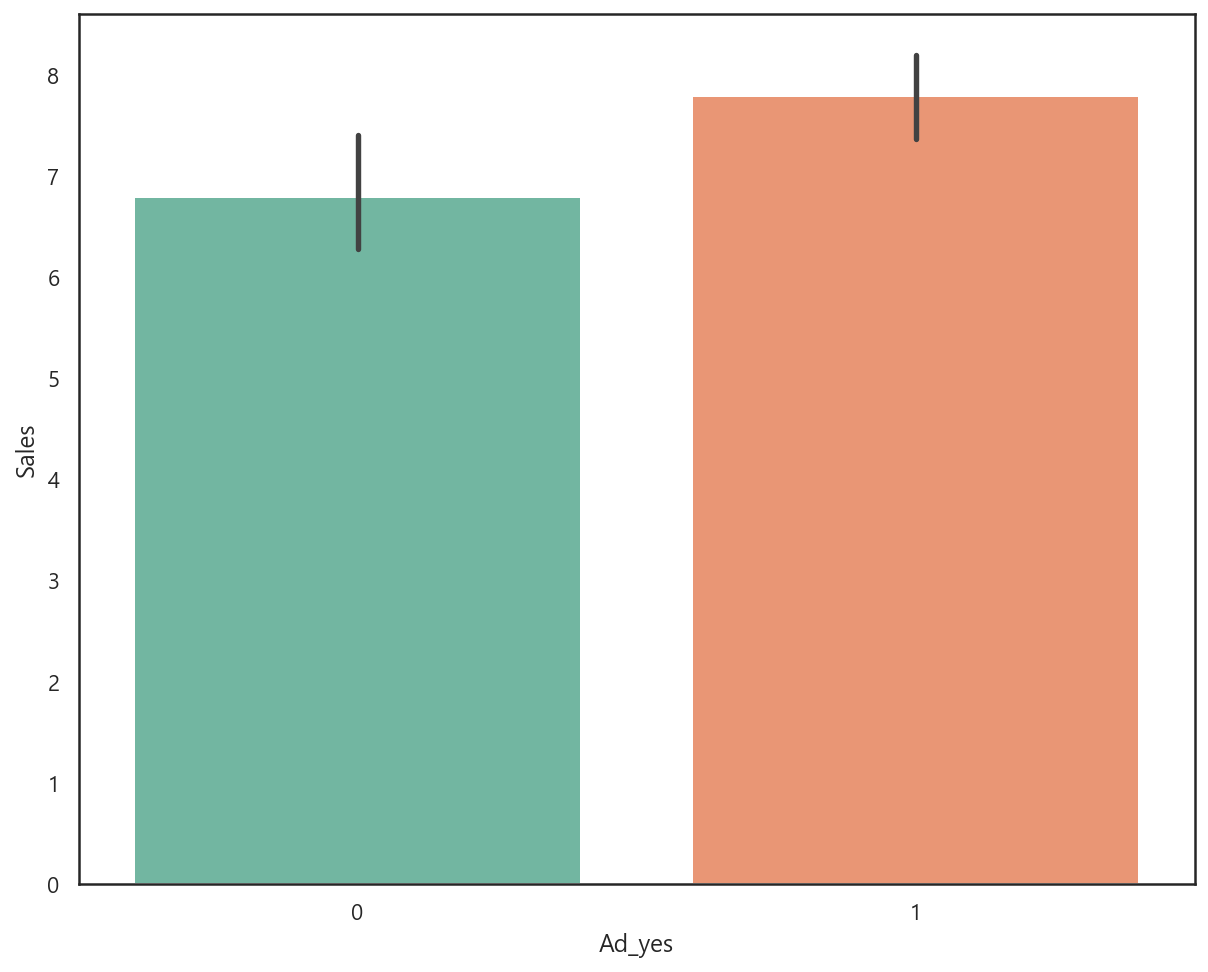

In [24]:
sns.barplot(x="Ad_yes", y=target, data = data)
plt.show()

- 광고 유무와 Sales는 약한 관계가 있는 것으로 보인다.

In [25]:
x["Ad_yes"] = data["Ad_yes"]

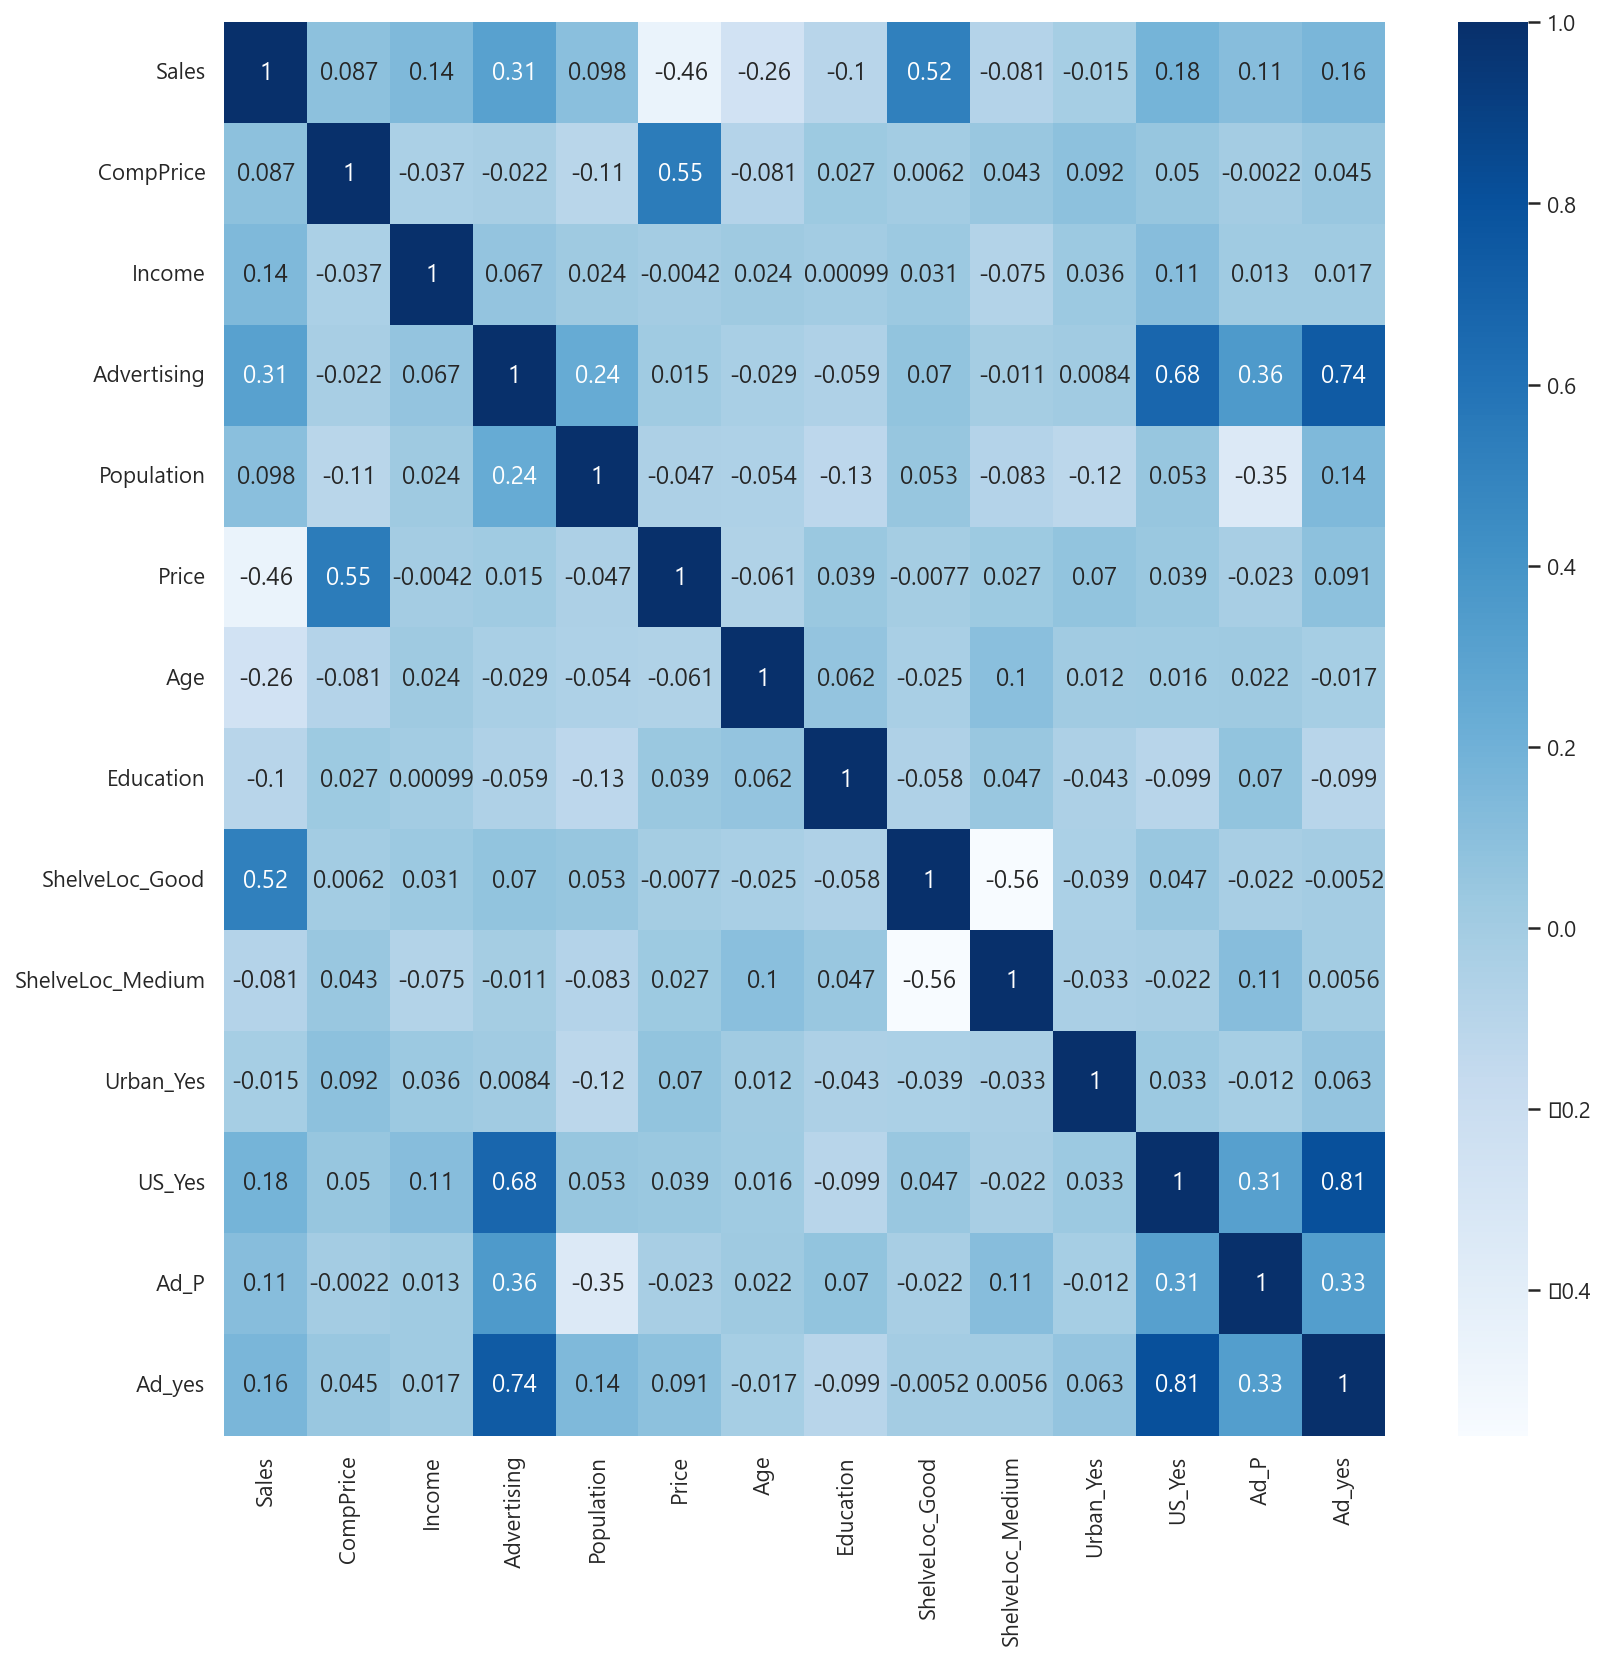

In [26]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [28]:
x_train_s = x_train.copy()
x_val_s = x_val.copy()

In [29]:
col_int = x.select_dtypes(['int64', 'float']).columns
col_int

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Ad_P'],
      dtype='object')

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s[col_int] = scaler.fit_transform(x_train_s[col_int])
x_val_s[col_int] = scaler.transform(x_val_s[col_int])

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [31]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 검증 및 평가
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

In [32]:
# 결과수집
result = {}

#### (1) Linear Regression 모델링

In [33]:
model = LinearRegression()

In [34]:
kf = KFold(n_splits=5, shuffle=True)
cv_score=cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

In [35]:
result['Linear Regression'] = [cv_score.mean()]

#### (2) Decision Tree 모델링

#### (3) KNN 모델링

#### (4) SVM 모델링

#### (5) Random Forest 모델링

In [36]:
model = RandomForestRegressor(random_state = 2022)

In [37]:
kf = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

In [38]:
result['Random Forest'] = [cv_score.mean()]

#### (6) XGB 모델링

In [39]:
model = XGBRegressor(random_state=2022)

In [40]:
kf = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

In [41]:
result['XGBoost'] = [cv_score.mean()]

**(7) 추가 LGBM**

In [42]:
model = LGBMRegressor(random_state=2022)

In [43]:
kf = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

In [44]:
result['LGBM'] = [cv_score.mean()]

In [45]:
# 중간 결과 확인
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score[0].round(3))
print('=' * 40)

Linear Regression 0.854
Random Forest 0.68
XGBoost 0.606
LGBM 0.752


## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

* 모델1 

In [47]:
keras.backend.clear_session()
model1 = keras.models.Sequential()
model1.add(keras.layers.Input(shape=(x.shape[1],)))
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(1))
model1.compile(loss='mae',
             optimizer=keras.optimizers.Adam(lr=0.001),
             metrics='mae'
             )

In [48]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


* 모델2

In [49]:
keras.backend.clear_session()
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(x.shape[1],)))
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(1))
model2.compile(loss='mae',
             optimizer=keras.optimizers.Adam(lr=0.001),
             metrics='mae'
             )

In [50]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 21,089
Trainable params: 21,089
Non-trainable params: 0
_________________________________________________________________


* 모델3

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


#### (1) Random Forest 모델 최적화

In [51]:
model_rf = RandomForestRegressor(random_state = 2022)
param = {
    'max_depth' : range(3,15),
    'n_estimators' : range(50,111,10)
}
model_rf = GridSearchCV(model_rf,
            param,
            cv=5,
            scoring='r2',
            verbose = 1)

In [52]:
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2022),
             param_grid={'max_depth': range(3, 15),
                         'n_estimators': range(50, 111, 10)},
             scoring='r2', verbose=1)

In [53]:
# 결과 확인
print(model_rf.best_params_)
print(model_rf.best_score_)

{'max_depth': 13, 'n_estimators': 110}
0.6414214346685878


#### (2) XGBRegressor 모델 최적화

In [54]:
model_xgb = XGBRegressor(random_state = 2022)
param = {
    'max_depth' : range(3,15),
    'n_estimators' : range(50,111,10)
}
model_xgb = GridSearchCV(model_xgb,
            param,
            cv=5,
            scoring='r2',
            verbose = 1)

In [55]:
model_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [56]:
# 결과 확인
print(model_xgb.best_params_)
print(model_xgb.best_score_)

{'max_depth': 3, 'n_estimators': 50}
0.6729699386645389


#### (3) LGBM 모델 최적화

In [57]:
model_lgbm = LGBMRegressor(random_state = 2022)
param = {
    'max_depth' : range(3,15),
    'n_estimators' : range(50,111,10)
}
model_lgbm = GridSearchCV(model_lgbm,
            param,
            cv=5,
            scoring='r2',
            verbose = 1)

In [58]:
model_lgbm.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'max_depth': range(3, 15),
                         'n_estimators': range(50, 111, 10)},
             scoring='r2', verbose=1)

In [59]:
# 결과 확인
print(model_lgbm.best_params_)
print(model_lgbm.best_score_)

{'max_depth': 3, 'n_estimators': 110}
0.7030745243059431


#### (4) 딥러닝 모델1 최적화

In [60]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [61]:
history = model1.fit(x_train_s,y_train,batch_size=32, epochs=1000,verbose=1,validation_split=0.2,callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 47ms/step - loss: 7.2702 - mae: 7.2702 - val_loss: 7.0783 - val_mae: 7.0783
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 6.9650 - mae: 6.9650 - val_loss: 6.7411 - val_mae: 6.7411
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.6287 - mae: 6.6287 - val_loss: 6.3458 - val_mae: 6.3458
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 6.2202 - mae: 6.2202 - val_loss: 5.8569 - val_mae: 5.8569
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 5.7084 - mae: 5.7084 - val_loss: 5.2353 - val_mae: 5.2353
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 5.0526 - mae: 5.0526 - val_loss: 4.4453 - val_mae: 4.4453
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 4.2556 - mae: 4.2556 - val_loss: 3.4915 - val_mae: 3.4915
Epoch 8/1000
6/6 [==============================] - 0s 9ms/step - loss: 3.3595 - mae: 3.

In [62]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
98,0.764562,0.764562,1.055573,1.055573,98
99,0.753801,0.753801,1.059736,1.059736,99
100,0.752319,0.752319,1.056793,1.056793,100
101,0.761877,0.761877,1.084792,1.084792,101
102,0.770621,0.770621,1.065711,1.065711,102


(0.0, 5.0)

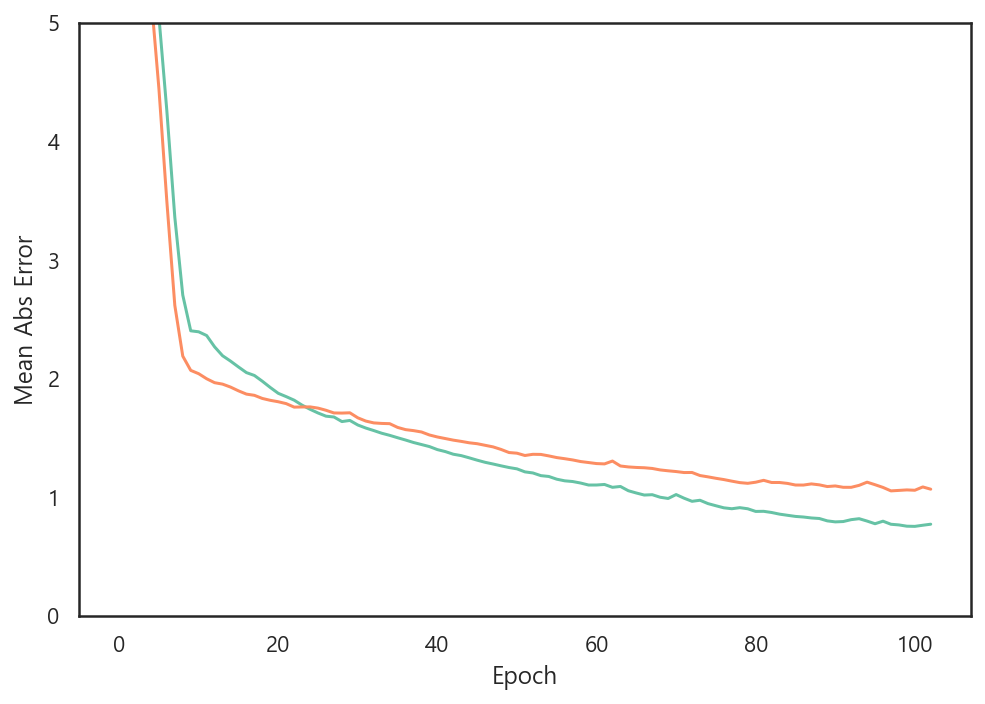

In [63]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mae'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
       label = 'Val Error')
plt.ylim([0,5])

#### (5) 딥러닝 모델2 최적화

In [64]:
history = model2.fit(x_train_s,y_train,batch_size=32, epochs=1000,verbose=1,validation_split=0.2,callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 43ms/step - loss: 7.2442 - mae: 7.2442 - val_loss: 6.7249 - val_mae: 6.7249
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 6.3750 - mae: 6.3750 - val_loss: 5.5519 - val_mae: 5.5519
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 5.0138 - mae: 5.0138 - val_loss: 3.7534 - val_mae: 3.7534
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 3.3381 - mae: 3.3381 - val_loss: 2.2675 - val_mae: 2.2675
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 2.4819 - mae: 2.4819 - val_loss: 2.1761 - val_mae: 2.1761
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 2.5798 - mae: 2.5798 - val_loss: 2.0820 - val_mae: 2.0820
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 2.3013 - mae: 2.3013 - val_loss: 2.0203 - val_mae: 2.0203
Epoch 8/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.2597 - mae: 2

In [65]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
50,0.753367,0.753367,1.068282,1.068282,50
51,0.763595,0.763595,1.050237,1.050237,51
52,0.727855,0.727855,1.032198,1.032198,52
53,0.791009,0.791009,1.081486,1.081486,53
54,0.743255,0.743255,1.026337,1.026337,54


(0.0, 5.0)

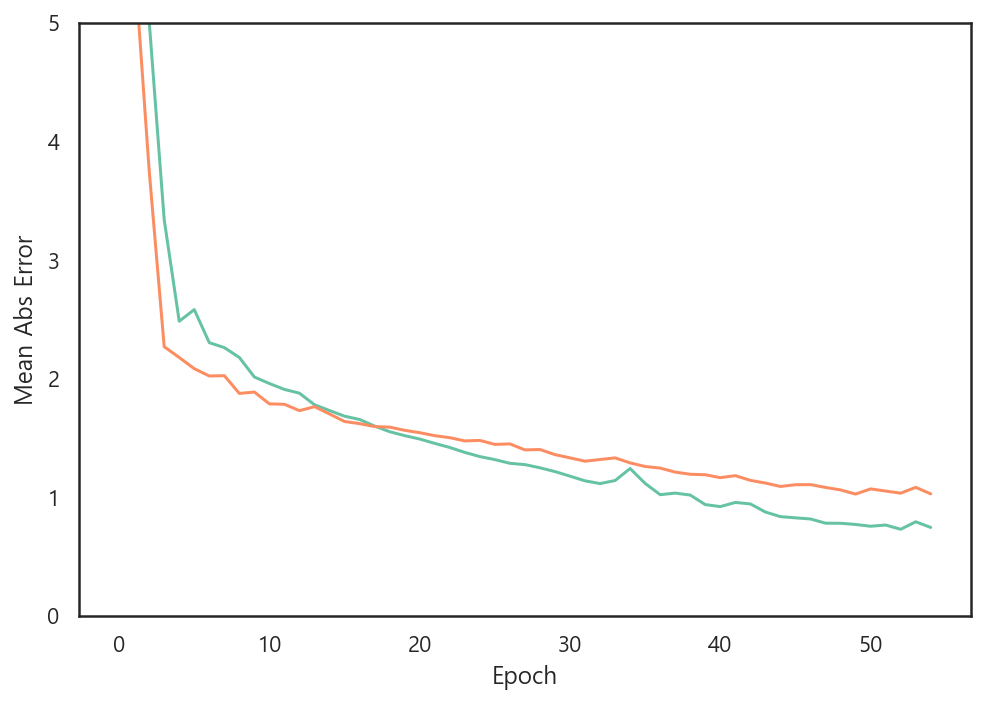

In [66]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mae'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
       label = 'Val Error')
plt.ylim([0,5])

## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

In [67]:
last_result = {}

#### (1) Random Forest 성능 평가

In [68]:
y_pred = model_rf.predict(x_val)
last_result["Random Forest"] = [mean_absolute_error(y_val, y_pred)]

#### (2) XGBRegressor 성능 평가

In [69]:
y_pred = model_xgb.predict(x_val)
last_result["XGB"] = [mean_absolute_error(y_val, y_pred)]

#### (3) LGBM 성능 평가

In [70]:
y_pred = model_lgbm.predict(x_val)
last_result["LGBM"] = [mean_absolute_error(y_val, y_pred)]

#### (4) 딥러닝 모델1 성능 평가

In [71]:
loss, mae = model1.evaluate(x_val_s, y_val, verbose=2)
last_result["DL_model1"] = [mae]

3/3 - 0s - loss: 1.0947 - mae: 1.0947 - 35ms/epoch - 12ms/step


#### (4) 딥러닝 모델2 성능 평가

In [72]:
loss, mae = model2.evaluate(x_val_s, y_val, verbose=2)
last_result["DL_model2"] = [mae]

3/3 - 0s - loss: 1.1012 - mae: 1.1012 - 36ms/epoch - 12ms/step


#### (5) 최종 성능 평가

In [73]:
# 평가 결과 확인
print('=' * 40)
for m_name, score in last_result.items():
    print(m_name, score[0])
print('=' * 40)

Random Forest 1.5585789147834732
XGB 1.4284209440019393
LGBM 1.457533670733693
DL_model1 1.0946853160858154
DL_model2 1.1011910438537598


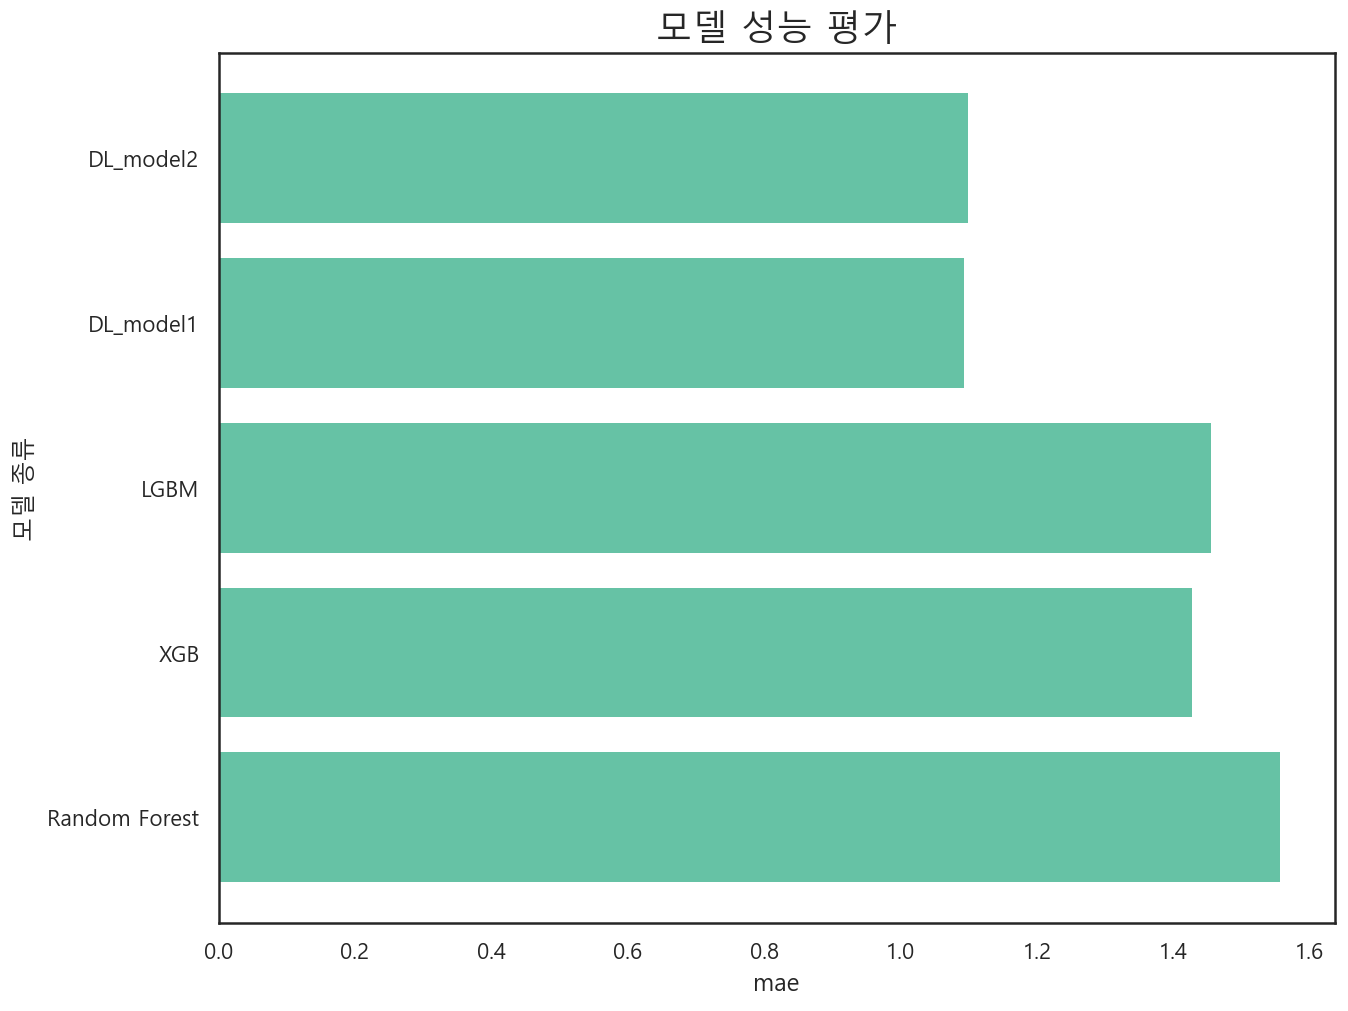

In [74]:
# 시각화
result_df = pd.DataFrame(last_result).T

plt.barh(width = result_df[0], y = result_df.index)
plt.title("모델 성능 평가", fontsize=18)

plt.xlabel("mae")
plt.ylabel("모델 종류")

plt.show()

- DL_model1 > DL_model2 > XGB > LGBM > RandomForest 순으로 좋은 성능이 나왔다

#### (6) 최종 모델 선정

- DL_model1이 가장 좋은 성능을 내었기에 최종 모델로 선정한다.
- 하지만 딥러닝 모델은 어떤 요소를 중요하게 평가했는지 알 수 없다는 한계점이 있어 머신러닝 모델 중 가장 성능이 좋게 나왔던 xgb 모델로 피쳐 중요도를 확인해본다.

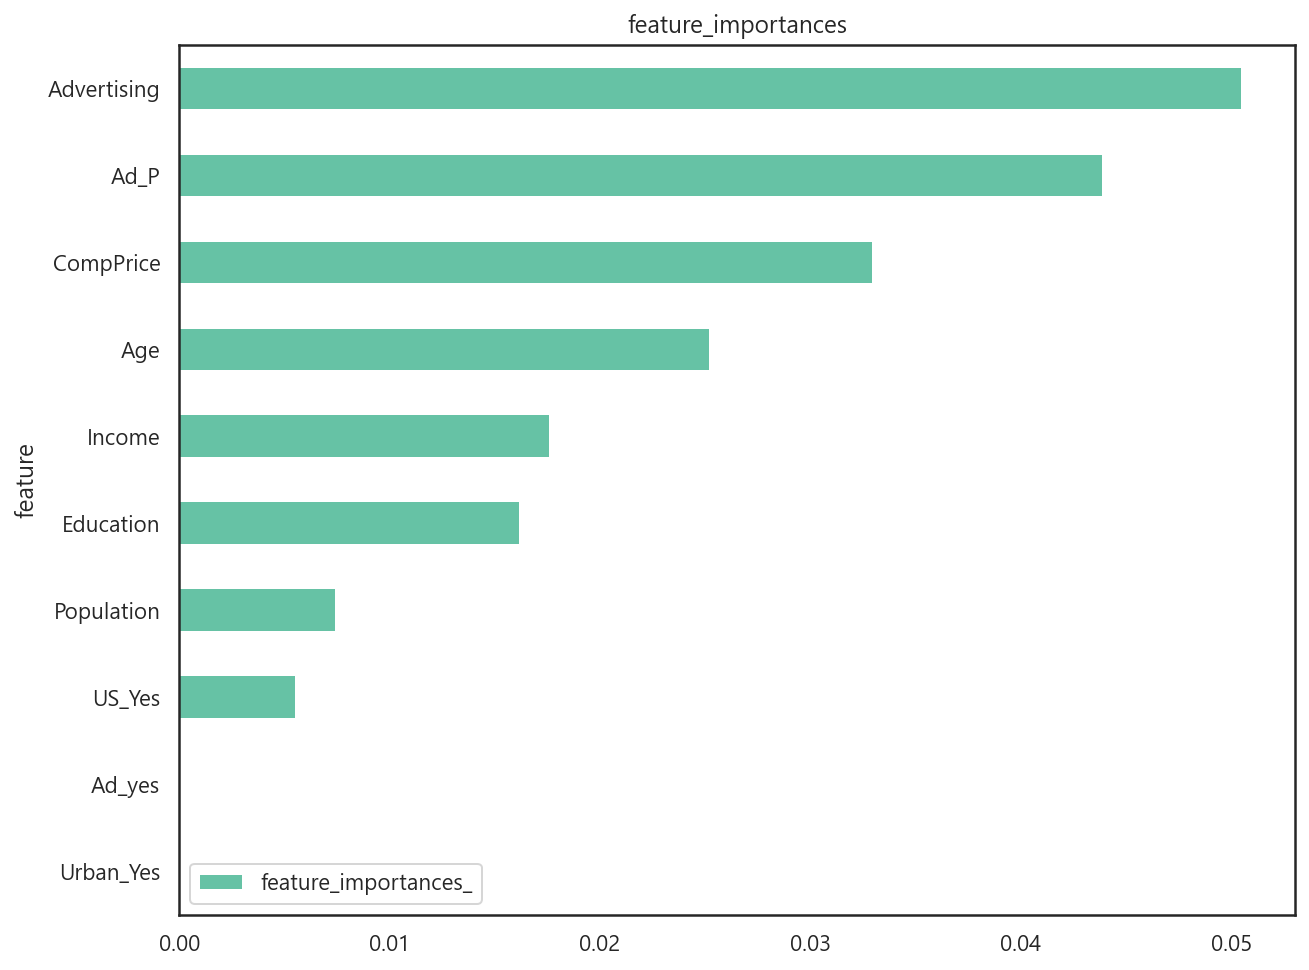

In [75]:
# 피쳐 중요도
result_df = pd.DataFrame()
result_df["feature"] = list(x_train)
result_df["feature_importances_"] = model_xgb.best_estimator_.feature_importances_
result_df.set_index("feature").sort_values("feature_importances_",ascending=True)[:10].plot(kind="barh",title="feature_importances")
plt.show()

- 'Advertising' > 'Ad_P' > 'CompPrice' 순으로 변수가 중요하다는 것을 시각화 결과를 통해 알 수 있다.
- 추가 변수로 도출한 'Ad_P'(지역인구별 광고비율)이 중요하게 평가된 요소 였다는 것을 알 수 있다.
- 의문점은 이전에 heatmap으로 시각화해서 데이터와 타겟간의 상관관계를 살펴보았을 때, 'Shelveloc_medium' 변수가 가장 상관관계가 높은 수치가 나왔었는데 xgboost 모델은 이 변수를 중요하게 판단하지 않았다는 것으로 평가하여서, 어떠한 상황과 변수때문에 이런 결과가 나왔을지 더 분석해볼 필요가 있다고 판단하였다.

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [76]:
# 가변수화 코드 실행


In [77]:
# NAN 채우기


In [78]:
# 경쟁사와 가격 차 변수 만들기


In [79]:
# 스케일링


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.